# Altair column sort example

By [Ben Welsh](http://palewi.re/who-is-ben-welsh/)

An example of how to sort the columns in a bar chart created by the Altair data visualization library. Created in response to a question from Joe Germuska.

In [1]:
import pandas as pd
import altair as alt

Read in the U.S. Census data file provided by Joe, median household income by county

In [2]:
df = pd.read_csv("input/mhhi_by_county.csv")

In [3]:
df.head()

,Unnamed: 0,name,geoid,b19013001
0,0,"Anchorage Municipality, Alaska",05000US02020,85634.0
1,1,"Fairbanks North Star Borough, Alaska",05000US02090,77328.0
2,2,"Matanuska-Susitna Borough, Alaska",05000US02170,69332.0
3,3,"Baldwin County, Alabama",05000US01003,56732.0
4,4,"Calhoun County, Alabama",05000US01015,41687.0


Make the chart.

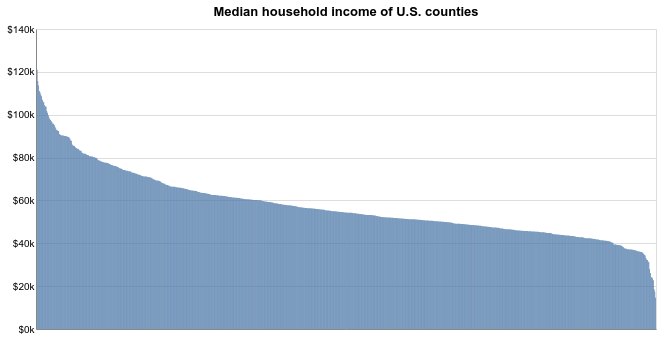

In [4]:
alt.Chart(df, title="Median household income of U.S. counties").mark_bar().encode(
    x=alt.X(
        "name:N",
        axis=alt.Axis(labels=False, title="", ticks=False),  # Remove all x-axis labels
        # Here's where you can resort the order of the columns on the x-axis
        sort=alt.SortField(
            # This SortField class requires at least three inputs,
            # which does seem like overkill. I'd like to see a simpler
            # way to pull this off.
            field='b19013001',  # First the field you want to sort on 
            op='sum',  # Then the operation to run on that field. In this case, we just total the value.
            order="descending"  # Finally, the order to sort.
        )
    ),
    y=alt.Y(
        "b19013001:Q",
        axis=alt.Axis(title="", format="$s", ticks=False)  # Tidy up the dollar labels
    )
).properties(width=620)  # We can cram in the bars and make them small by restricting the width

Joe asked a follow up question. He wants to know how to highlight a single bar.

One approach is to add a nominal column that will mark the highlight, which can then be applied with Altair's `color` attribute.

In [5]:
df['highlight'] = df.geoid == '05000US17031'

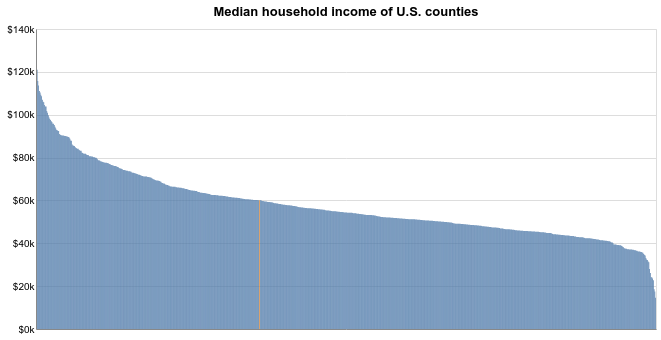

In [6]:
alt.Chart(df, title="Median household income of U.S. counties").mark_bar().encode(
    x=alt.X(
        "name:N",
        axis=alt.Axis(labels=False, title="", ticks=False),  # Remove all x-axis labels
        sort=alt.SortField(
            field='b19013001',
            op='sum',
            order="descending"
        ),
    ),
    y=alt.Y(
        "b19013001:Q",
        axis=alt.Axis(title="", format="$s", ticks=False)
    ),
    # Here it is!
    color=alt.Color("highlight", legend=None)
).properties(width=620)

You can do it purely in Altair with a few of the transform functions.

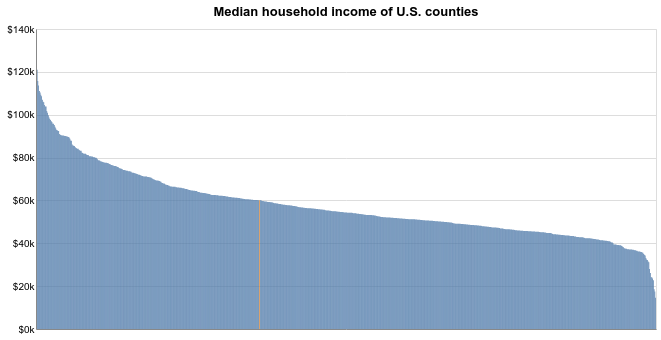

In [10]:
alt.Chart(df, title="Median household income of U.S. counties").mark_bar().encode(
    x=alt.X(
        "name:N",
        axis=alt.Axis(labels=False, title="", ticks=False),
        sort=alt.SortField(
            field='b19013001',
            op='sum',
            order="descending"
        ),
    ),
    y=alt.Y(
        "b19013001:Q",
        axis=alt.Axis(title="", format="$s", ticks=False)
    ),
    # The color is assigned by the calcuated field...
    color=alt.Color("is_highlighted:N", legend=None)
).properties(
    width=620
).transform_calculate(
    # ... which is generated on the fly based on a test
    "is_highlighted", alt.datum.geoid == '05000US17031'
)